# YouTube Trending Videos
#### Sarah Taghadosi
##### 400222019

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json


### 1. Data Collection and Merging

In this step, we iterate over all available CSV files (from different countries) and merge them with their corresponding JSON category files to build a unified dataframe called df_all.

In [340]:
# This function takes a country code, loads its YouTube CSV and JSON category mapping,
# merges them, and returns the final DataFrame.
def country_load(country_code):
    csv_file = f"/Users/sarahtgh/Downloads/youtube/archive/{country_code}videos.csv"
    json_file = f"/Users/sarahtgh/Downloads/youtube/archive/{country_code}_category_id.json"

    # Load CSV
    df = pd.read_csv(csv_file, encoding='ISO-8859-1')
    df['country'] = country_code

    # Load JSON
    with open(json_file, 'r') as f:
        category_data = json.load(f)

    category_mapping = {
        int(item['id']): item['snippet']['title']
        for item in category_data['items']
    }

    df['category_name'] = df['category_id'].map(category_mapping)
    df.dropna(inplace=True)

    return df


In [341]:
# we will load all our 10 dataframes for each country using country_load function we built
CA_data = country_load("CA")
GB_data = country_load("GB")
DE_data = country_load("DE")
FR_data = country_load("FR")
IN_data = country_load("IN")
JP_data = country_load("JP")
KR_data = country_load("KR")
MX_data = country_load("MX")
RU_data = country_load("RU")
US_data = country_load("US")

In [342]:
# here we merge all 10 data sets to a single one called data!
data = pd.concat(
    [CA_data, US_data, GB_data, DE_data, FR_data, IN_data, JP_data, KR_data, MX_data, RU_data],
    ignore_index=True
)

### 3. Initial Data Overview (Before Cleaning)

In this section, we examine the raw dataset to understand its structure.  
We check for null values, duplicate entries, and variable types.  
This helps us plan the cleaning and preprocessing steps more effectively.


In [343]:
# تعداد ردیف‌ها و ستون‌ها
print("Shape of the dataset:", df_all.shape)

# تعداد داده‌های تکراری
duplicate_count = df_all.duplicated().sum()
print("Duplicate rows:", duplicate_count)

# بررسی مقادیر null
null_summary = df_all.isnull().sum()

# بررسی یکتایی و نوع داده‌ها
unique_counts = df_all.nunique()
dtypes = df_all.dtypes

# جدول خلاصه از ویژگی‌ها
initial_summary = pd.DataFrame({
    'Null Count': null_summary,
    'Unique Values': unique_counts,
    'Data Type': dtypes
})

# نمایش خلاصه
display(initial_summary)

# توزیع کشورها
print("\n--- Distribution by Country ---\n")
display(df_all['country'].value_counts().to_frame(name='count'))

# توزیع دسته‌بندی‌ها
print("\n--- Distribution by Category Name ---\n")
display(df_all['category_name'].value_counts().to_frame(name='count'))


Shape of the dataset: (363372, 21)
Duplicate rows: 0


,Null Count,Unique Values,Data Type
video_id,0,184287,object
trending_date,0,205,datetime64[ns]
title,0,186272,object
channel_title,0,37824,object
category_id,0,18,int64
publish_time,0,169286,"datetime64[ns, UTC]"
tags,0,142211,object
views,0,240399,int64
likes,0,73693,int64
dislikes,0,16715,int64



--- Distribution by Country ---



,count
country,
US,40901
CA,40881
DE,40840
FR,40724
RU,40693
MX,40402
GB,38745
IN,33089
KR,32251



--- Distribution by Category Name ---



,count
category_name,
Entertainment,104567
People & Blogs,52297
Music,41454
News & Politics,35746
Comedy,26077
Sports,23035
Film & Animation,20193
Howto & Style,18554
Gaming,11063


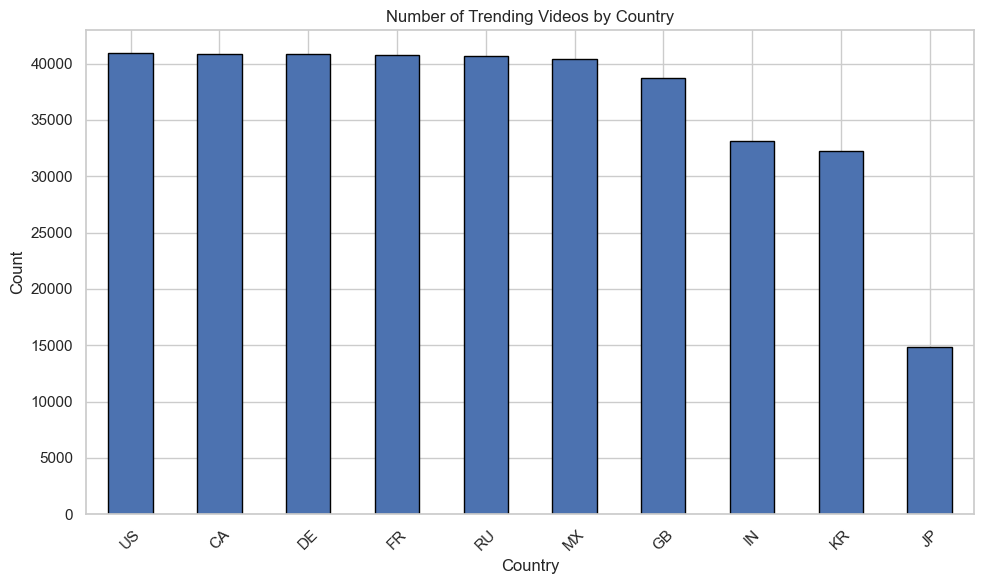

In [344]:
import matplotlib.pyplot as plt

# Country Distribution
country_counts = df_all['country'].value_counts()

plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', edgecolor='black')
plt.title('Number of Trending Videos by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



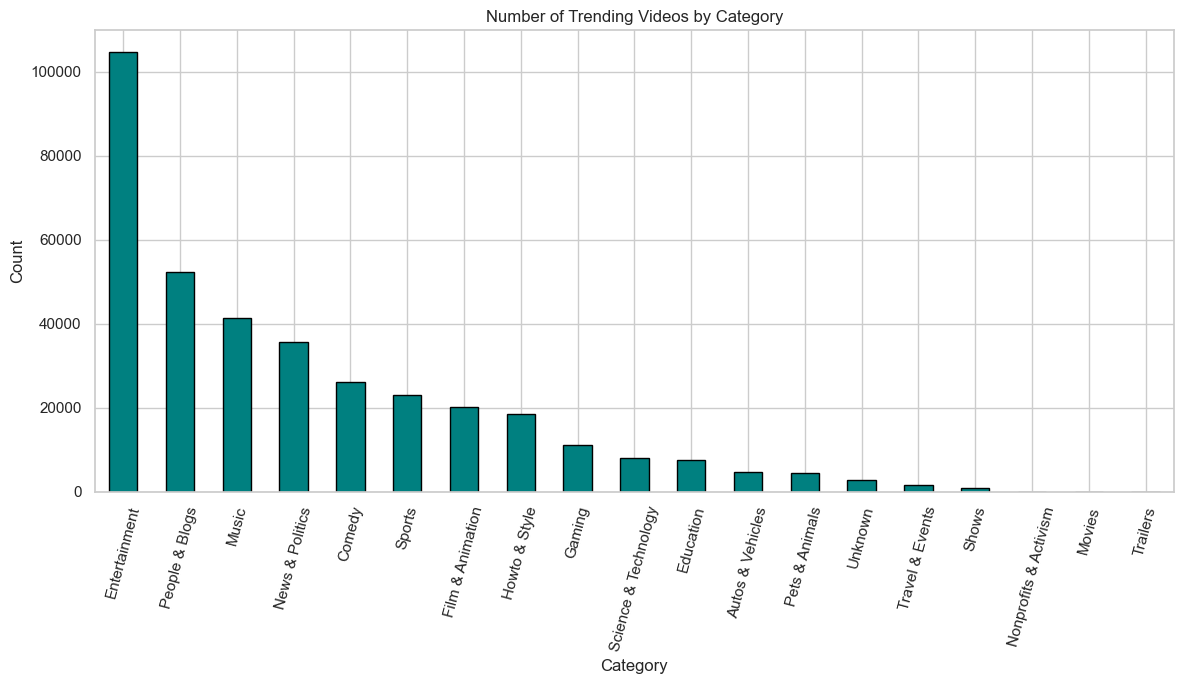

In [345]:
# Category Name Distribution
category_counts = df_all['category_name'].value_counts()

plt.figure(figsize=(12, 7))
category_counts.plot(kind='bar', edgecolor='black', color='teal')
plt.title('Number of Trending Videos by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


## 4. Data Cleaning

In this section, we clean the dataset by:  

Removing duplicate rows  

Fixing incorrect data types (e.g., converting dates to datetime format)  

Handling missing values  

Removing rows with negative values in numeric columns

In [346]:
# حذف ردیف‌های تکراری
df_all = df_all.drop_duplicates()
print(f"Shape after removing duplicates: {df_all.shape}")


Shape after removing duplicates: (363372, 21)


In [347]:
# نمایش مقادیر Null
null_summary = df_all.isnull().sum()
print("\nNull Values:\n")
print(null_summary[null_summary > 0])



Null Values:

Series([], dtype: int64)


In [348]:
# جایگزینی null در category_name با 'Unknown'
df_all['category_name'] = df_all['category_name'].fillna('Unknown')


In [349]:
# تبدیل فرمت تاریخ به استاندارد yyyy-mm-dd
df_all['trending_date'] = pd.to_datetime(df_all['trending_date'], format='%y.%d.%m', errors='coerce')


In [350]:
df_all['publish_time'] = pd.to_datetime(df_all['publish_time'], errors='coerce')


In [351]:
df_all.reset_index(drop=True, inplace=True)


In [352]:
# حذف ردیف‌هایی که category_name ندارند (چون دسته‌بندی خیلی مهمه)
df_all = df_all.dropna(subset=['category_name'])

# برای description که ممکنه اطلاعات اضافی باشه، نال‌ها رو با '[No description]' جایگزین می‌کنیم
df_all['description'] = df_all['description'].fillna('[No description]')

# ریست ایندکس بعد از حذف ردیف‌ها
df_all.reset_index(drop=True, inplace=True)

# بررسی دوباره نال‌ها برای اطمینان
print("Remaining null values:\n")
print(df_all.isnull().sum())


Remaining null values:

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
category_name             0
country                   0
like_ratio                0
dislike_ratio             0
comment_ratio             0
dtype: int64


### 5. Distribution of Engagement Metrics
Understanding how user engagement metrics like views, likes, dislikes, and comments are distributed is crucial in identifying the skewness and overall activity levels on trending videos.

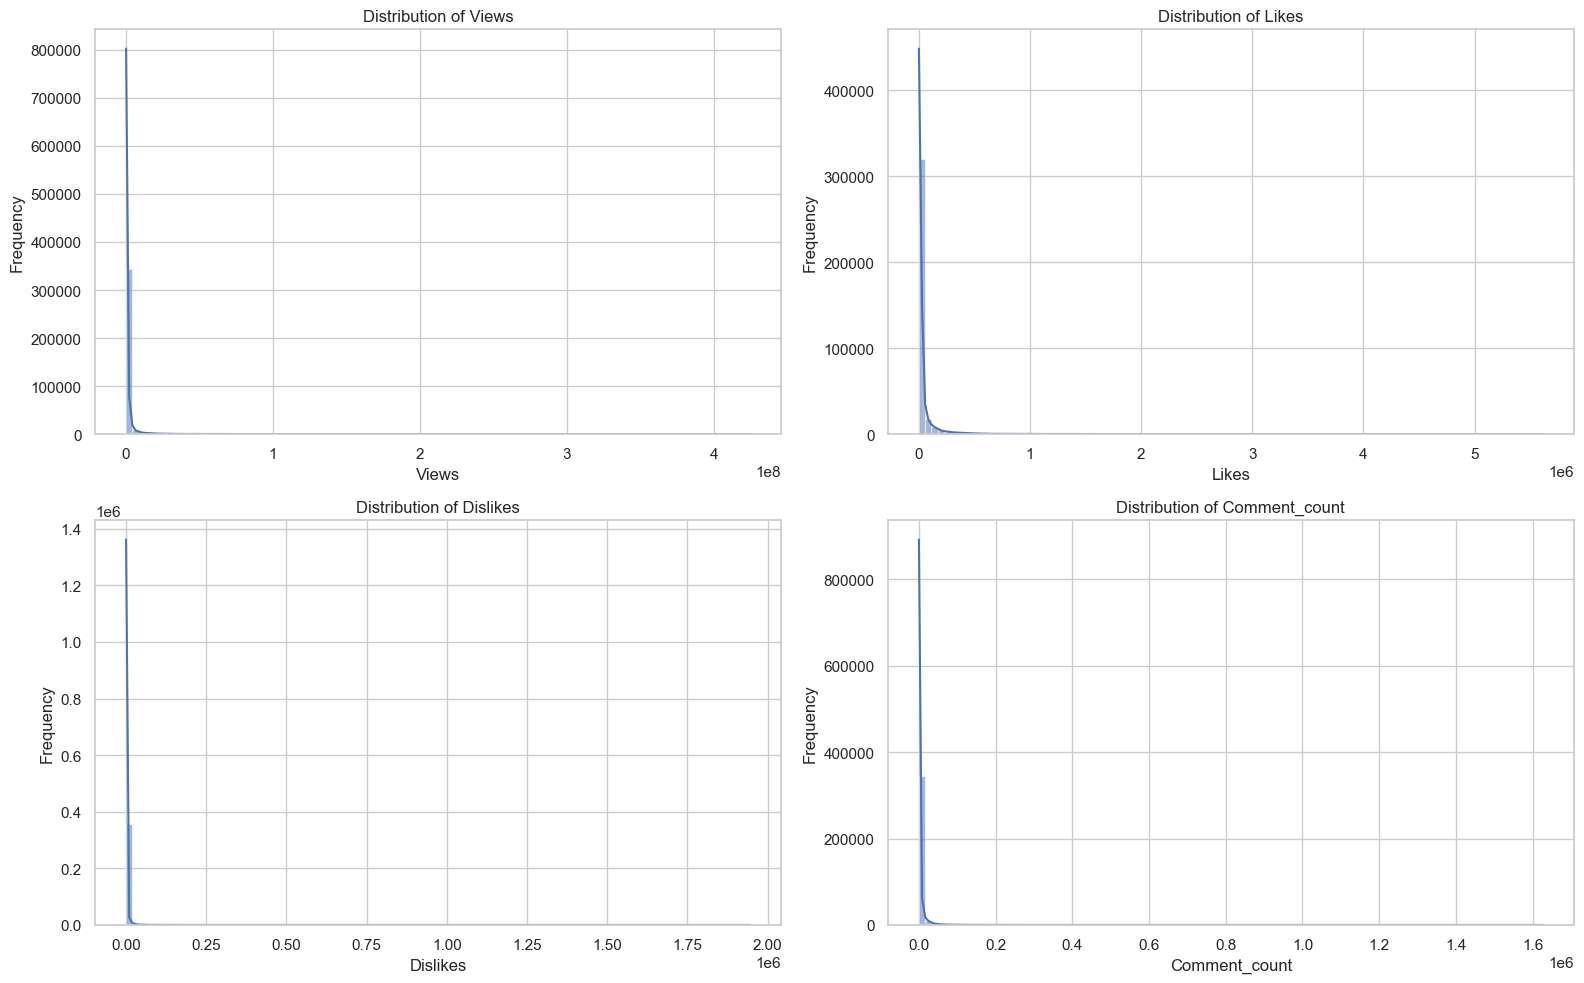

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select columns for engagement analysis
engagement_columns = ['views', 'likes', 'dislikes', 'comment_count']

# Set figure size
plt.figure(figsize=(16, 10))

# Plot distribution for each column
for i, column in enumerate(engagement_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_all[column], bins=100, kde=True)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### 6. Correlation Between Engagement Metrics

To understand the relationship between numerical features, we calculate and visualize the Pearson correlation matrix for key engagement metrics such as views, likes, dislikes, and comment_count.


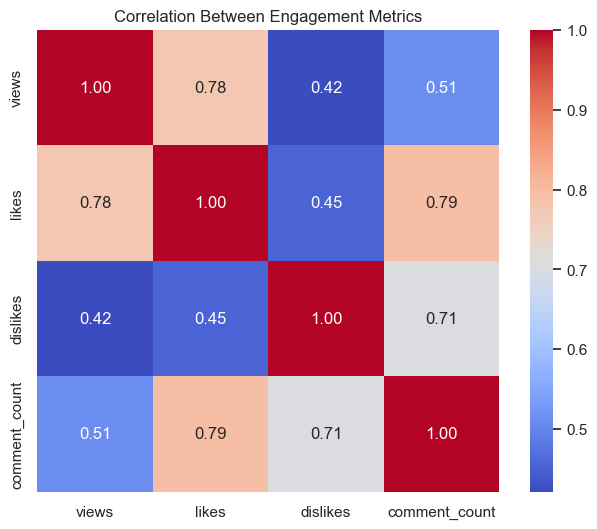

In [354]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['views', 'likes', 'dislikes', 'comment_count']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Between Engagement Metrics")
plt.show()


### Top 3 trending videos

In [355]:
# Top 3 trending videos in each country (by views)
top_by_country = df.sort_values('views', ascending=False).groupby('country').head(3)
top_by_country[['country', 'video_id', 'title', 'channel_title', 'views', 'category_name']]


,country,video_id,title,channel_title,views,category_name
365438,GB,_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,424538912,Music
365238,GB,_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,413586699,Music
365034,GB,_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,402650804,Music
334624,US,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,225211923,Music
334422,US,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,220490543,Music
334223,US,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,217750076,Music
179633,CA,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,137843120,Unknown
45859,IN,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,125432237,Entertainment
179356,CA,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,125431369,Unknown
144022,KR,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,113876217,Entertainment


In [356]:
# Top 3 trending videos in each category (globally)
top_by_category = df.sort_values('views', ascending=False).groupby('category_name').head(3)
top_by_category[['category_name', 'video_id', 'title', 'channel_title', 'views', 'country']]


,category_name,video_id,title,channel_title,views,country
365438,Music,_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,424538912,GB
365238,Music,_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,413586699,GB
365034,Music,_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,402650804,GB
345215,Entertainment,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,169884583,GB
345004,Entertainment,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,165905535,GB
344798,Entertainment,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,164743418,GB
179633,Unknown,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,137843120,CA
179356,Unknown,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,125431369,CA
83258,Unknown,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,113876217,DE
360794,People & Blogs,BhIEIO0vaBE,To Our Daughter,Kylie Jenner,62338362,GB


In [357]:
print("Country values:")
print(df['country'].value_counts())
print("Unique countries:", df['country'].unique())


Country values:
country
US    40949
CA    40881
DE    40840
RU    40739
FR    40724
MX    40451
GB    38916
IN    37352
KR    34567
JP    20523
Name: count, dtype: int64
Unique countries: ['MX' 'IN' 'DE' 'JP' 'KR' 'CA' 'RU' 'FR' 'US' 'GB']


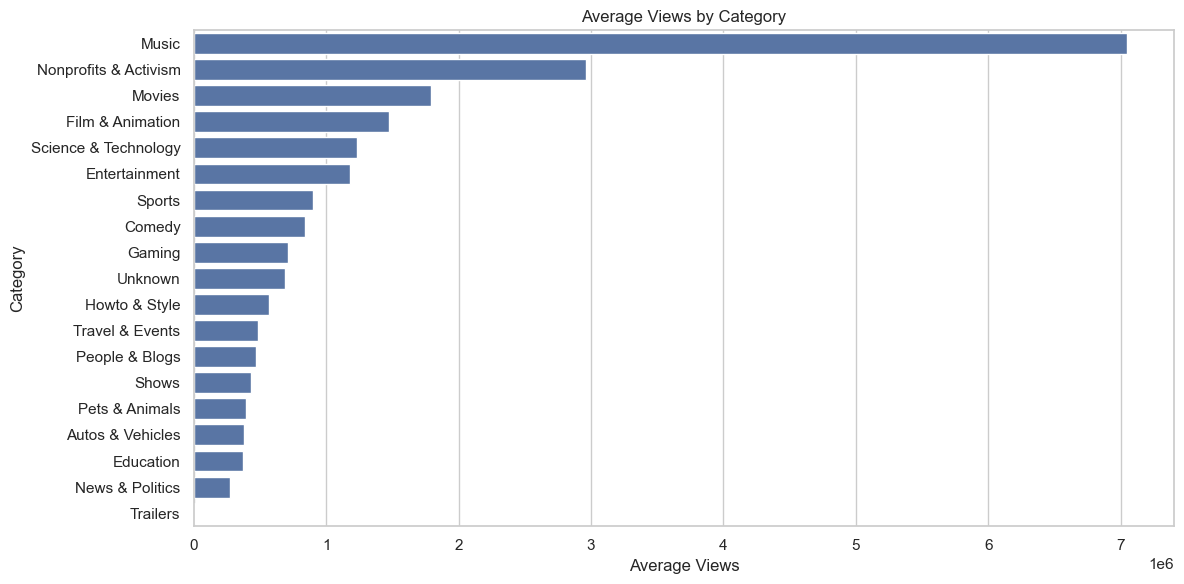

In [358]:
category_views = df.groupby('category_name')['views'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_views.values, y=category_views.index)
plt.title('Average Views by Category')
plt.xlabel('Average Views')
plt.ylabel('Category')
plt.tight_layout()
plt.show()



 ✅ Up to now, we've completed:
 - Data Collection and Merging
 - Initial Overview (nulls, dtypes, uniques)
 - Data Cleaning and Preprocessing
 - Basic Visualizations:
   - Country distribution
   - Category distribution
   - Engagement metrics summary

#### 📌 Q1: How are engagement metrics (views, likes, and dislikes) distributed overall and across different video categories?

##### --- Distribution of Views, Likes, Dislikes ---

/Users/sarahtgh/Library/Python/3.9/lib/python/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/sarahtgh/Library/Python/3.9/lib/python/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


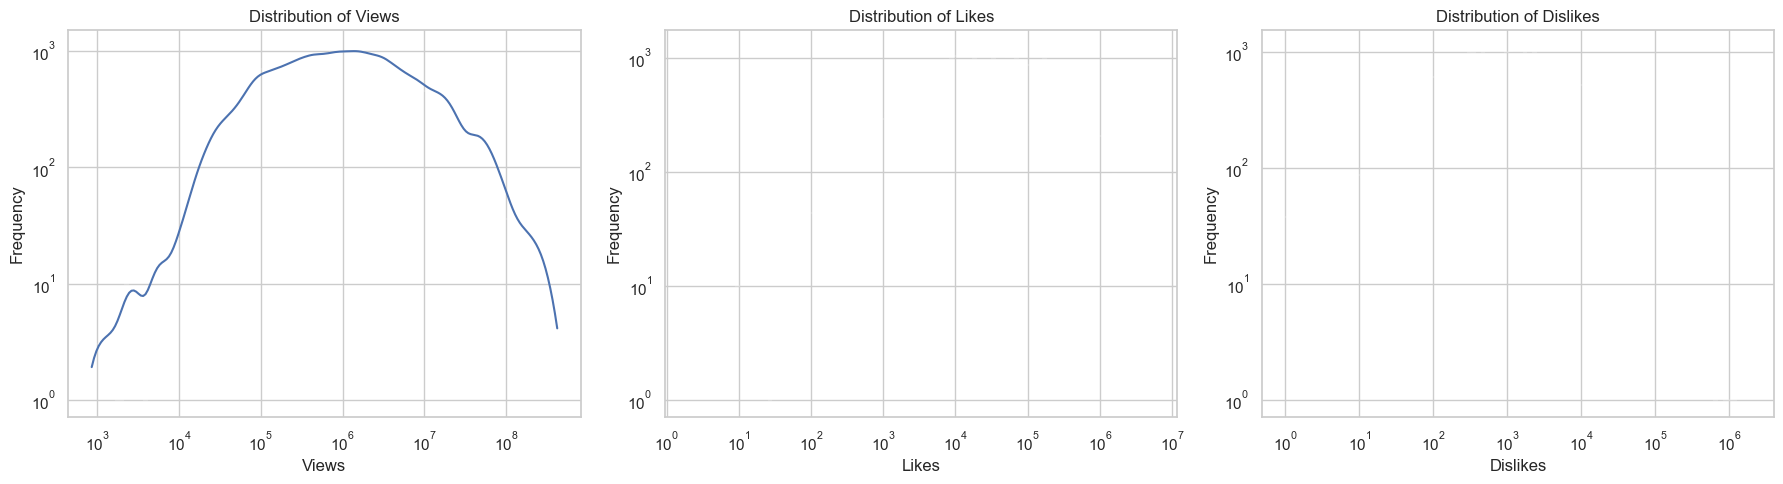

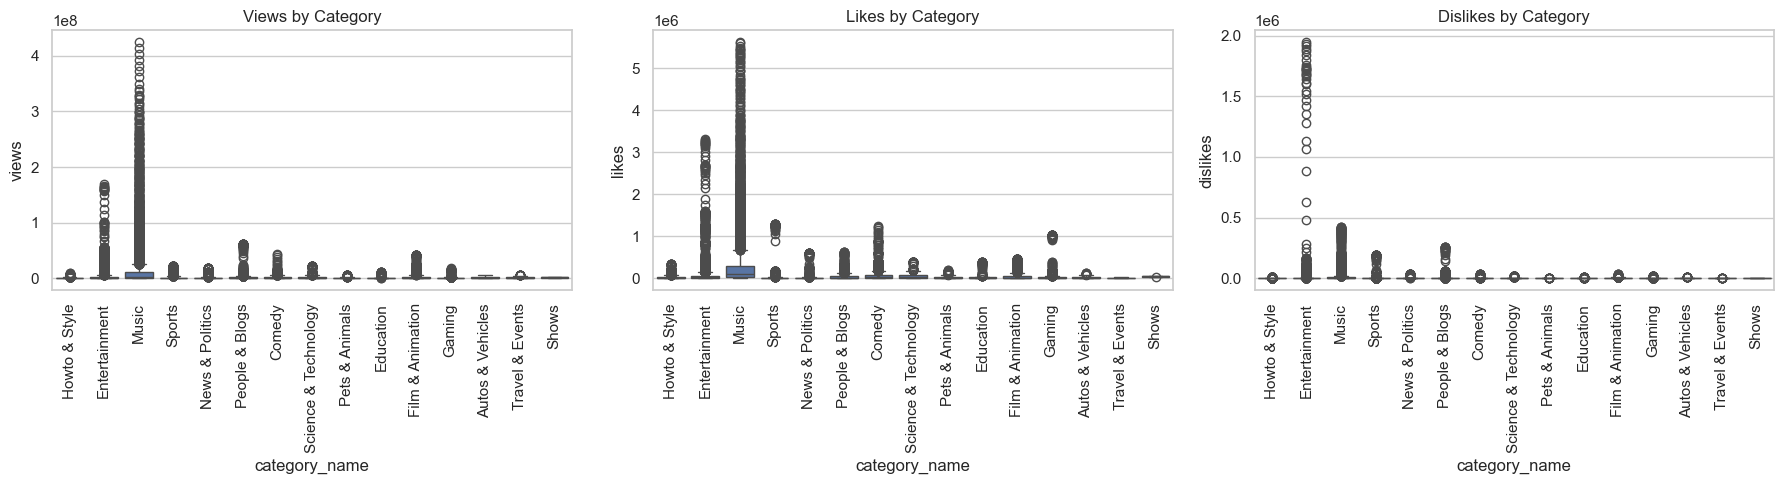

In [359]:
metrics = ['views', 'likes', 'dislikes']

plt.figure(figsize=(18, 5))
for i, col in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_cleaned[col], bins=100, kde=True, log_scale=(True, True))
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# --- Boxplots by Category ---
plt.figure(figsize=(18, 5))
for i, col in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df_cleaned, x='category_name', y=col)
    plt.xticks(rotation=90)
    plt.title(f'{col.capitalize()} by Category')
plt.tight_layout()
plt.show()


 📝 Interpretation:
 - Views, likes, and dislikes are all right-skewed.
 - Certain categories have more extreme values (e.g., Music, Entertainment).
 - We'll use log transformation for better pattern detection in future steps if needed.


### 📌 Q2: Which YouTube channels and video categories trend the most in each country and globally?

#### 🔝 Top trending channels globally

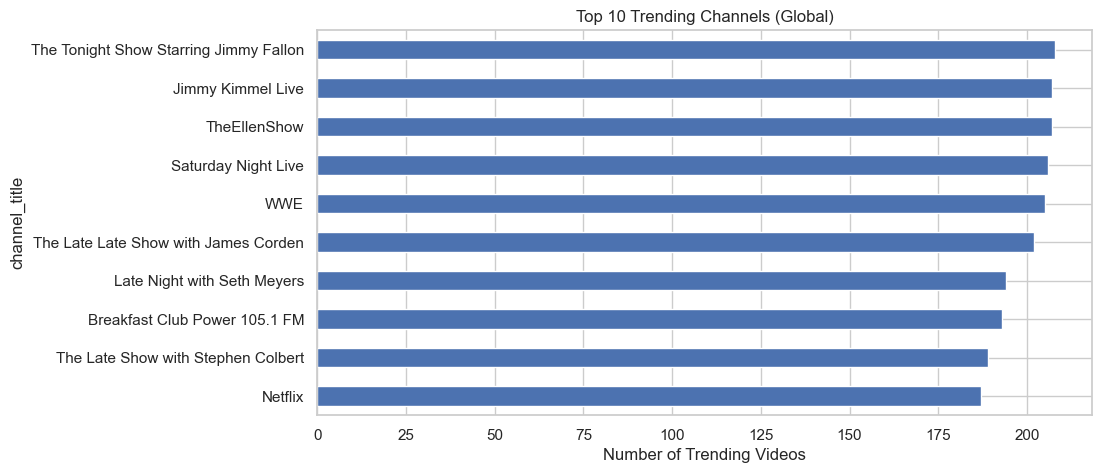

In [360]:
top_channels = df_cleaned['channel_title'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_channels.plot(kind='barh')
plt.title('Top 10 Trending Channels (Global)')
plt.xlabel('Number of Trending Videos')
plt.gca().invert_yaxis()
plt.show()

##### 🔝 Top categories globally


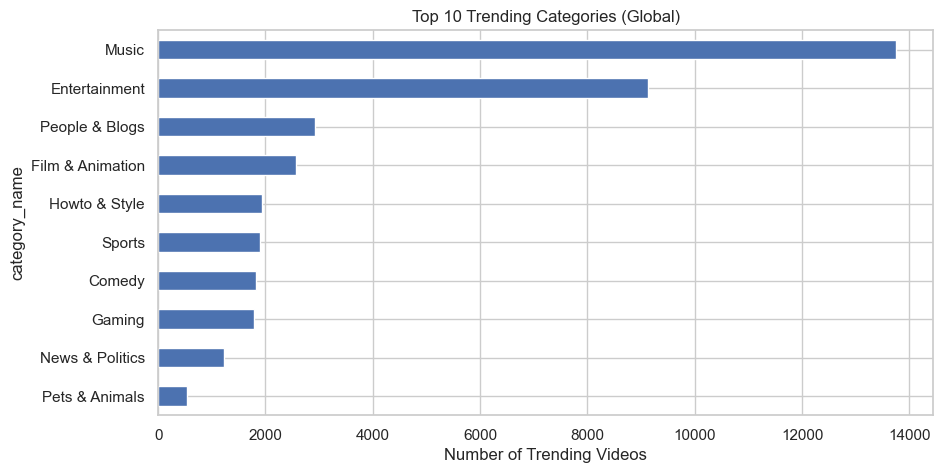

In [361]:
top_categories = df_cleaned['category_name'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_categories.plot(kind='barh')
plt.title('Top 10 Trending Categories (Global)')
plt.xlabel('Number of Trending Videos')
plt.gca().invert_yaxis()
plt.show()

##### 🔍 Top categories by country (stacked bar)


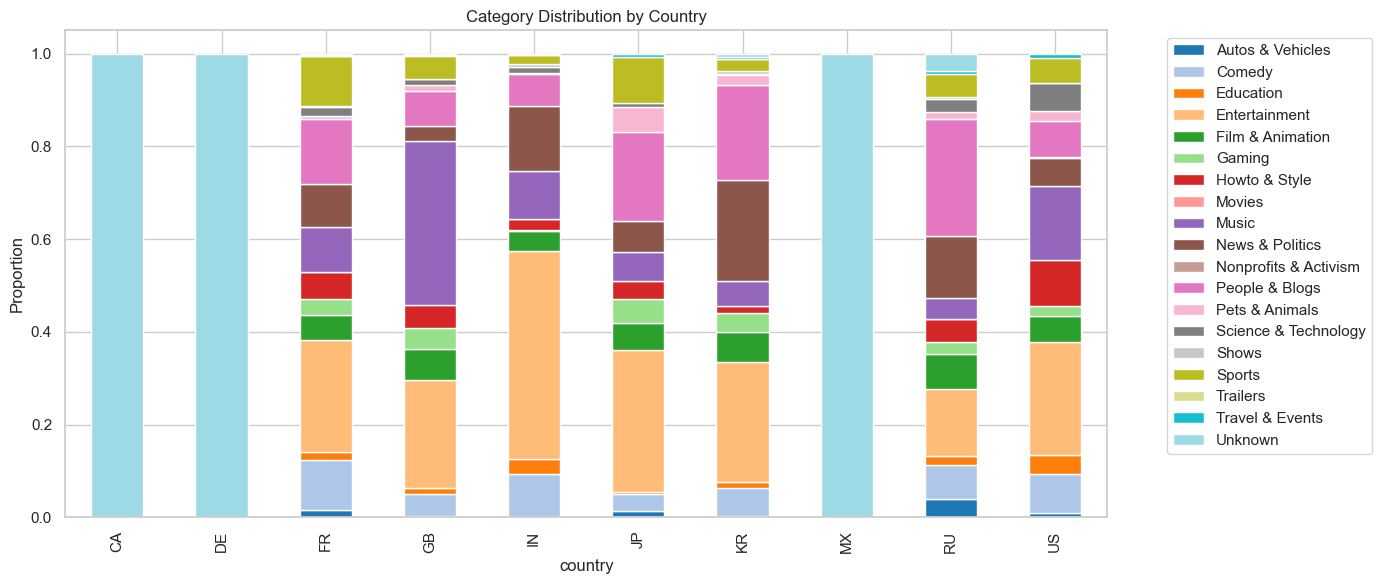

In [362]:
country_category = df.groupby(['country', 'category_name']).size().unstack().fillna(0)
country_category_pct = (country_category.T / country_category.T.sum()).T

country_category_pct.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title('Category Distribution by Country')
plt.ylabel('Proportion')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 🔝 top 10 most liked videos across all countries

In [363]:
top_liked_videos = df.sort_values('likes', ascending=False).head(10)
top_liked_videos[['title', 'channel_title', 'likes', 'views', 'category_name', 'country']]
  

,title,channel_title,likes,views,category_name,country
373664,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5613827,123010920,Music,GB
334350,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5613827,123010920,Music,US
334149,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5595203,121219886,Music,US
373494,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5595203,121219886,Music,GB
333938,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5530568,115664850,Music,US
373314,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5530568,115664850,Music,GB
373145,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5486349,111882133,Music,GB
333732,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5486349,111882133,Music,US
375427,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,5444541,259721696,Music,GB
333530,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5439015,107756615,Music,US


/var/folders/7x/st2npcgx3wdb526rvqtw1trm0000gn/T/ipykernel_17035/260660341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_liked_videos, y='title', x='likes', palette='mako')
/var/folders/7x/st2npcgx3wdb526rvqtw1trm0000gn/T/ipykernel_17035/260660341.py:6: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  plt.tight_layout()
/var/folders/7x/st2npcgx3wdb526rvqtw1trm0000gn/T/ipykernel_17035/260660341.py:6: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  plt.tight_layout()
/var/folders/7x/st2npcgx3wdb526rvqtw1trm0000gn/T/ipykernel_17035/260660341.py:6: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  plt.tight_layout()
/var/folders/7x/st2npcgx3wdb526rvqtw1trm0000gn/T/ipykernel_17035/260660341.py:6: UserWarning: Glyph 45380 (\N{HANGUL SYLL

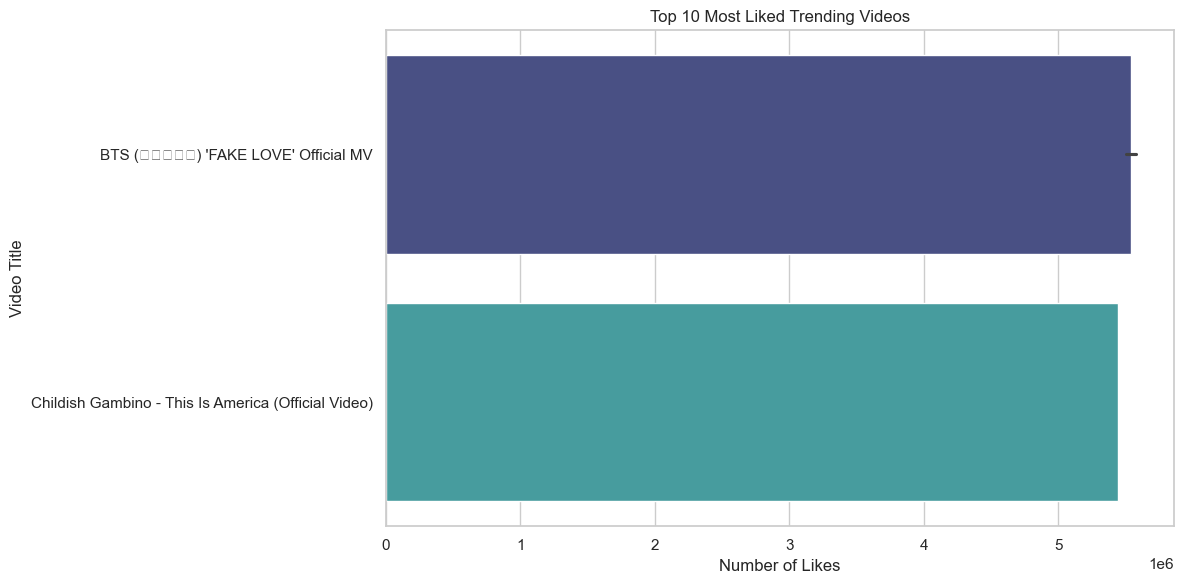

In [364]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_liked_videos, y='title', x='likes', palette='mako')
plt.title('Top 10 Most Liked Trending Videos')
plt.xlabel('Number of Likes')
plt.ylabel('Video Title')
plt.tight_layout()
plt.show()



### 📌 3. Are there seasonal or day-of-week patterns in trending videos? How does the upload day and time impact video engagement?

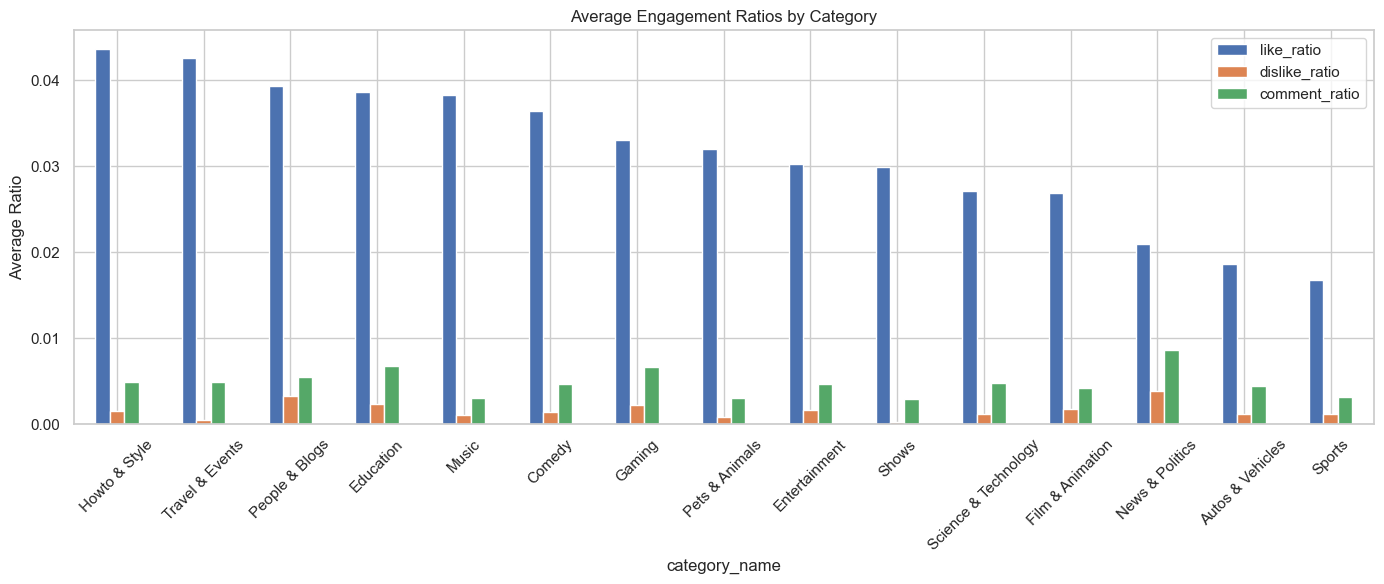

In [365]:
# محاسبه نسبت‌های تعامل برای هر ویدیو
df_cleaned['like_ratio'] = df_cleaned['likes'] / df_cleaned['views']
df_cleaned['dislike_ratio'] = df_cleaned['dislikes'] / df_cleaned['views']
df_cleaned['comment_ratio'] = df_cleaned['comment_count'] / df_cleaned['views']

# میانگین نسبت‌ها در هر دسته‌بندی
category_engagement = df_cleaned.groupby('category_name')[['like_ratio', 'dislike_ratio', 'comment_ratio']].mean().sort_values(by='like_ratio', ascending=False)

# رسم نمودار نسبت‌های تعامل در دسته‌بندی‌های مختلف
category_engagement.plot(kind='bar', figsize=(14,6))
plt.title("Average Engagement Ratios by Category")
plt.ylabel("Average Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📌 Q4: Do controversial videos, defined by a high dislike ratio, receive more engagement than universally liked ones?

 define a video as "controversial" if its dislike ratio > 0.3


In [366]:
# Define controversial and non-controversial
df['controversial'] = df['dislike_ratio'] > 0.3

# Compare average views and comments between the two
engagement_comparison = df.groupby('controversial')[['views', 'comment_count']].mean()
engagement_comparison


,views,comment_count
controversial,,
False,1.326792e+06,4254.111401
True,7.083230e+04,2366.656716


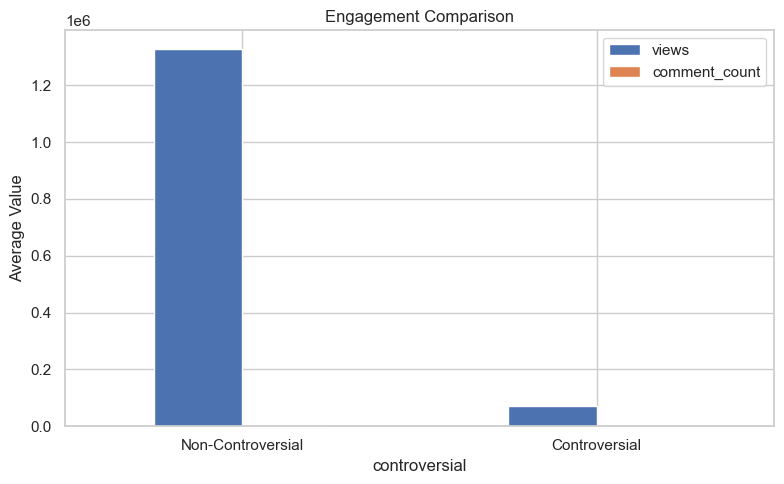

In [367]:
import matplotlib.pyplot as plt

engagement_comparison.plot(kind='bar', figsize=(8, 5), title='Engagement Comparison')
plt.xticks(ticks=[0, 1], labels=['Non-Controversial', 'Controversial'], rotation=0)
plt.ylabel('Average Value')
plt.tight_layout()
plt.show()


Insight: Based on the average values, non-controversial videos tend to receive significantly more views and comments than controversial ones. This suggests that controversial videos do not necessarily generate higher engagement.

### 📌 Q5: How do video tags influence engagement, and which tags are most commonly used in trending videos?


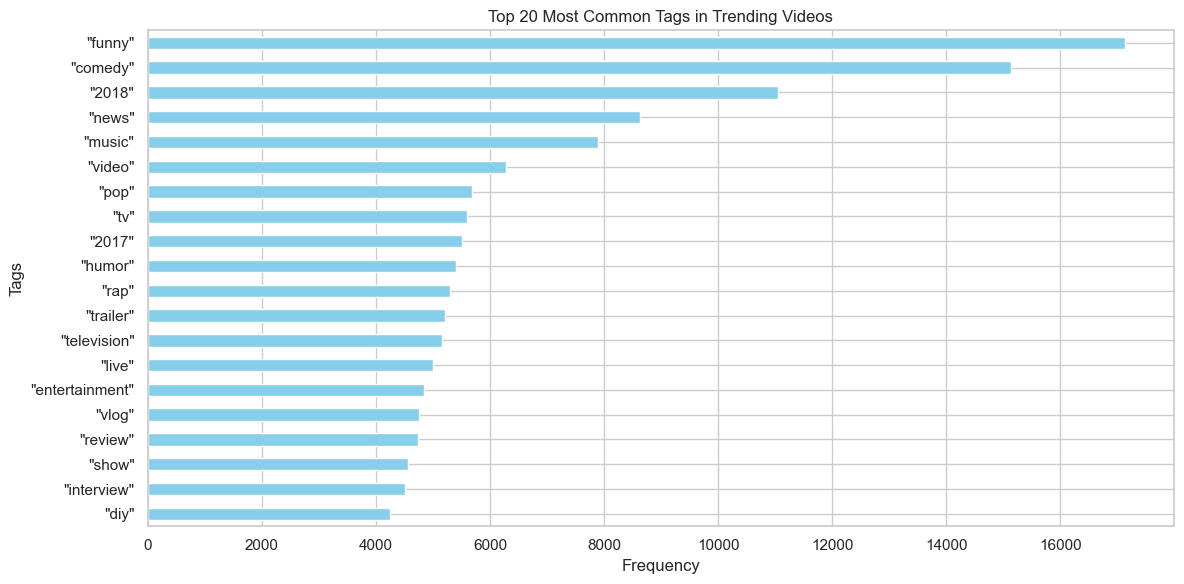

In [368]:
# Split tags by separator and explode to get individual tags
df['individual_tags'] = df['tags'].str.split('|')
df_exploded_tags = df.explode('individual_tags')

# Remove placeholder '[none]' and strip whitespaces
df_exploded_tags = df_exploded_tags[df_exploded_tags['individual_tags'].str.lower() != '[none]']
df_exploded_tags['individual_tags'] = df_exploded_tags['individual_tags'].str.strip().str.lower()

# Get top 20 most frequent tags
top_tags = df_exploded_tags['individual_tags'].value_counts().head(20)

# Plot top tags
plt.figure(figsize=(12,6))
top_tags.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 20 Most Common Tags in Trending Videos')
plt.xlabel('Frequency')
plt.ylabel('Tags')
plt.tight_layout()
plt.show()


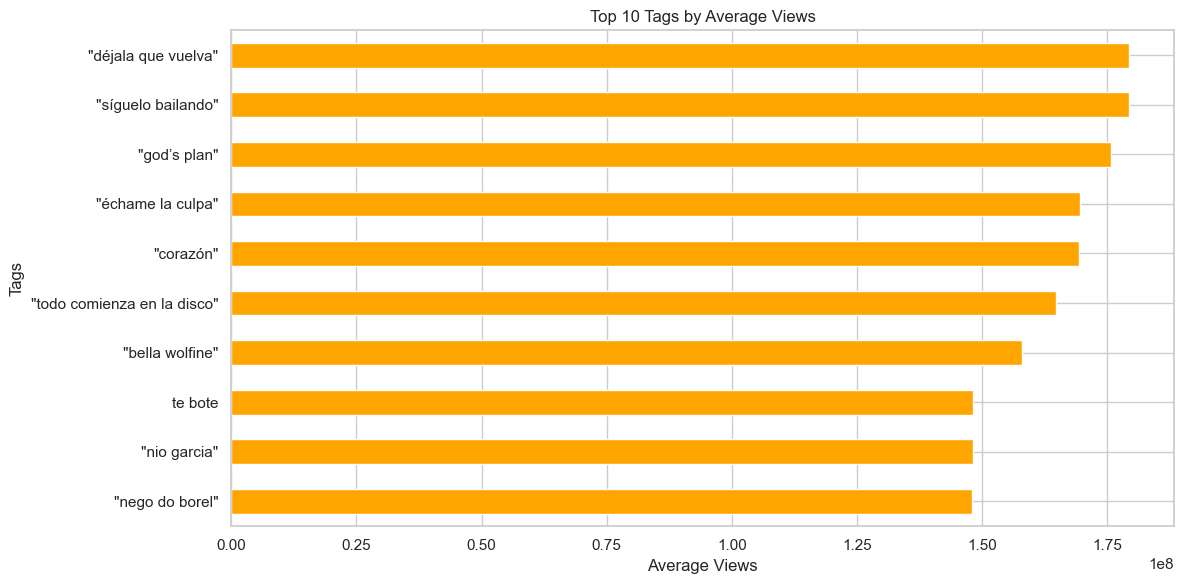

In [369]:
# Group by individual tag and calculate average engagement metrics
tag_engagement = df_exploded_tags.groupby('individual_tags')[['views', 'likes', 'comment_count']].mean()

# Top tags by views
top_views_tags = tag_engagement.sort_values(by='views', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
top_views_tags['views'].sort_values().plot(kind='barh', color='orange')
plt.title('Top 10 Tags by Average Views')
plt.xlabel('Average Views')
plt.ylabel('Tags')
plt.tight_layout()
plt.show()


### 📌 Q6 : How does the length of a video title impact engagement levels?

/var/folders/7x/st2npcgx3wdb526rvqtw1trm0000gn/T/ipykernel_17035/3003923459.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  title_length_engagement = df.groupby('title_length_group')[['views', 'likes', 'comment_count']].mean()


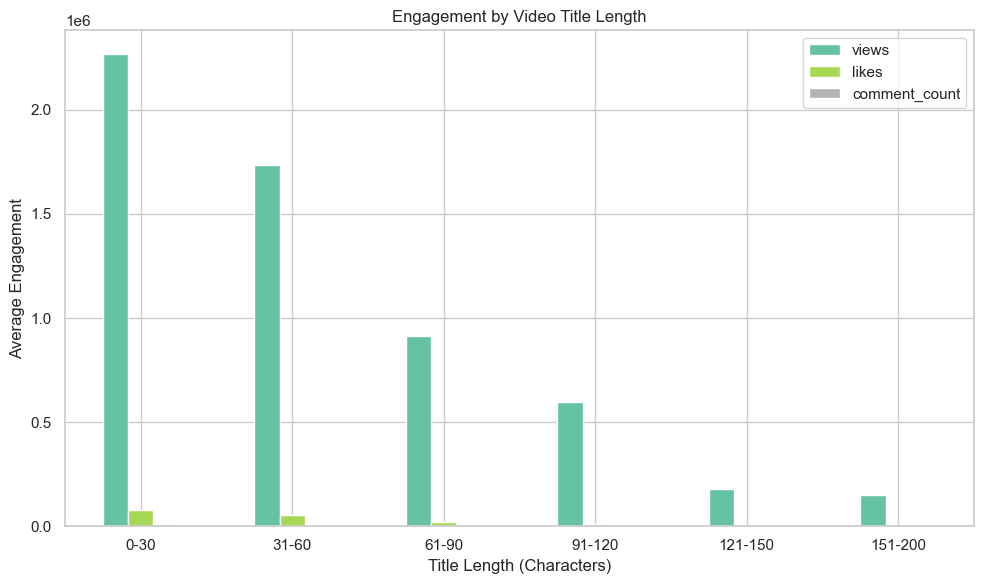

In [370]:
# Create a new column for title length (character count)
df['title_length'] = df['title'].apply(len)

# Bin title lengths into groups (e.g., short, medium, long titles)
df['title_length_group'] = pd.cut(df['title_length'],
                                   bins=[0, 30, 60, 90, 120, 150, 200],
                                   labels=['0-30', '31-60', '61-90', '91-120', '121-150', '151-200'])

# Group by title length bin and calculate average engagement
title_length_engagement = df.groupby('title_length_group')[['views', 'likes', 'comment_count']].mean()

# Plot
title_length_engagement.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Engagement by Video Title Length')
plt.xlabel('Title Length (Characters)')
plt.ylabel('Average Engagement')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 📌 Q7 : Is there a relationship between video title sentiment (positive/neutral/negative) and engagement levels?


In [371]:
import sys
!{sys.executable} -m pip install textblob


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


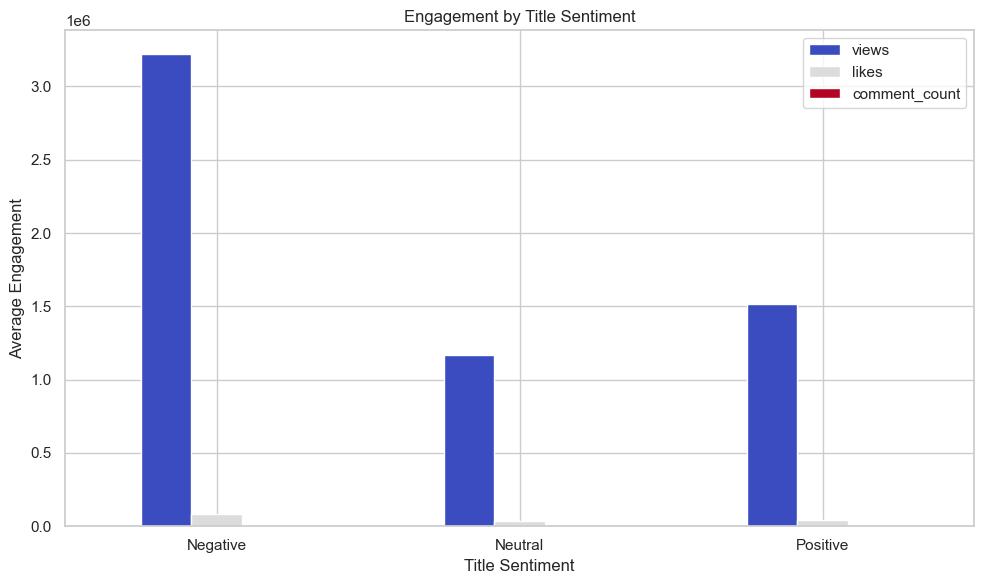

In [372]:
import matplotlib.pyplot as plt
from textblob import TextBlob

# Create a sentiment polarity column from video titles
df['title_sentiment'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Label sentiment as Positive, Neutral, or Negative
def get_sentiment_label(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['title_sentiment'].apply(get_sentiment_label)

# Group by sentiment and calculate average engagement metrics
sentiment_engagement = df.groupby('sentiment_label')[['views', 'likes', 'comment_count']].mean()

# Plot the results
sentiment_engagement.plot(kind='bar', figsize=(10, 6), title='Engagement by Title Sentiment', colormap='coolwarm')
plt.xlabel('Title Sentiment')
plt.ylabel('Average Engagement')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 📌 Q8 : Do clickbait-style titles, such as those containing words like ”shocking” or ”must watch,” result in higher engagement? (extra point)

In [373]:
clickbait_keywords = ['shocking', 'must watch', 'unbelievable', 'you won’t believe', 
                      'secret', 'exposed', 'insane', 'amazing', 'incredible', 'epic']


In [374]:
import re

# Define function to detect clickbait
def is_clickbait(title):
    title = title.lower()
    return any(re.search(rf'\b{kw}\b', title) for kw in clickbait_keywords)

# Apply to dataframe
df['clickbait'] = df['title'].apply(is_clickbait)


In [375]:
clickbait_engagement = df.groupby('clickbait')[['views', 'likes', 'comment_count']].mean()


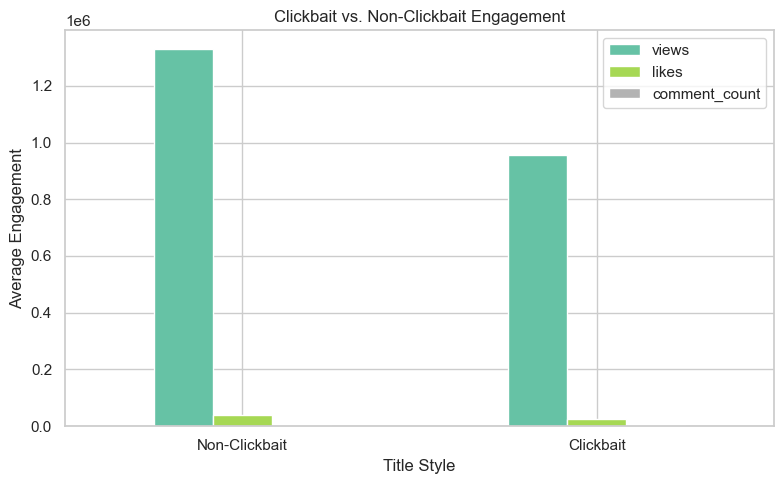

In [376]:
clickbait_engagement.plot(kind='bar', figsize=(8, 5), title='Clickbait vs. Non-Clickbait Engagement', colormap='Set2')
plt.xticks(ticks=[0, 1], labels=['Non-Clickbait', 'Clickbait'], rotation=0)
plt.xlabel("Title Style")
plt.ylabel("Average Engagement")
plt.tight_layout()
plt.show()


## What Makes a YouTube Video Timeless and Universally Popular?



### Q1: Which videos appear in the trending list of multiple countries, and how common is this phenomenon?

In [377]:
# Count how many unique countries each video_id appeared in
video_country_counts = df[['video_id', 'country']].drop_duplicates()
country_occurrence = video_country_counts['video_id'].value_counts()

# Filter videos that appeared in more than one country
multi_country_videos = country_occurrence[country_occurrence > 1]

# Display results
print(f"Number of videos trending in multiple countries: {multi_country_videos.shape[0]}")
print("\nTop 10 videos appearing in most countries:")
multi_country_videos.head(10)


Number of videos trending in multiple countries: 13769

Top 10 videos appearing in most countries:


video_id
DkeiKbqa02g    10
XiHiW4N7-bo    10
g4Hbz2jLxvQ    10
iWZmdoY1aTE    10
u9Mv98Gr5pY    10
OrnpSe4OChM    10
tCXGJQYZ9JA    10
pVxOVlm_lE8    10
tjA7nAHOAww    10
FlsCjmMhFmw     9
Name: count, dtype: int64

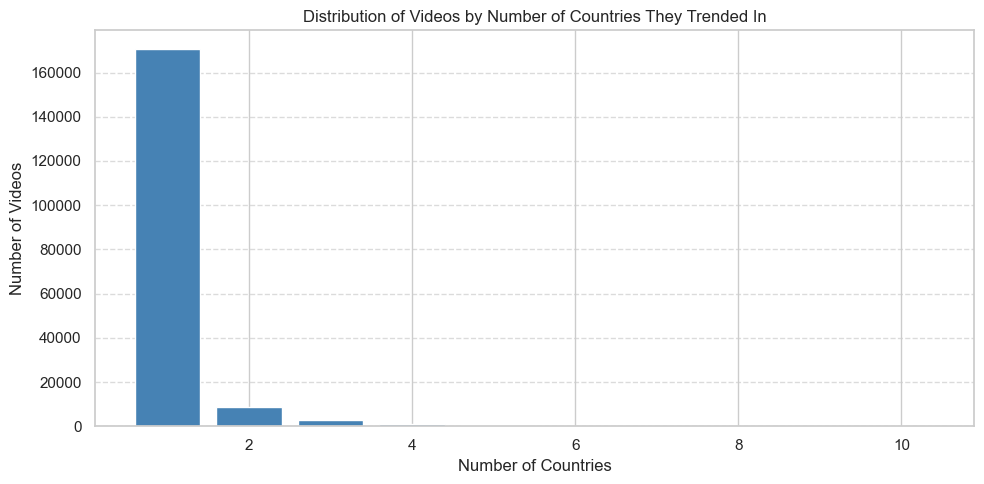

In [378]:
# Create a distribution of how many videos trend in how many countries
country_dist = country_occurrence.value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 5))
plt.bar(country_dist.index, country_dist.values, color='steelblue')
plt.xlabel('Number of Countries')
plt.ylabel('Number of Videos')
plt.title('Distribution of Videos by Number of Countries They Trended In')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Q2: Which videos appear in the trending list for the longest time (regardless of country)?

In [379]:
# Count how many times each video_id appears in the trending list (each row = one trending date)
video_trend_days = df.groupby('video_id').size().sort_values(ascending=False)

# Display the top 10 videos with the most trending appearances
print("Top 10 videos with the most days in trending:")
video_trend_days.head(10)


Top 10 videos with the most days in trending:


video_id
#NAME?         2312
VYOjWnS4cMY      92
UUkn-enk2RU      89
tCXGJQYZ9JA      83
iWZmdoY1aTE      82
YBpdL9hSac4      80
ffxKSjUwKdU      80
i5qOzqD9Rms      78
NooW_RbfdWI      77
8h--kFui1JA      76
dtype: int64

/var/folders/7x/st2npcgx3wdb526rvqtw1trm0000gn/T/ipykernel_17035/3659348051.py:7: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
/Users/sarahtgh/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


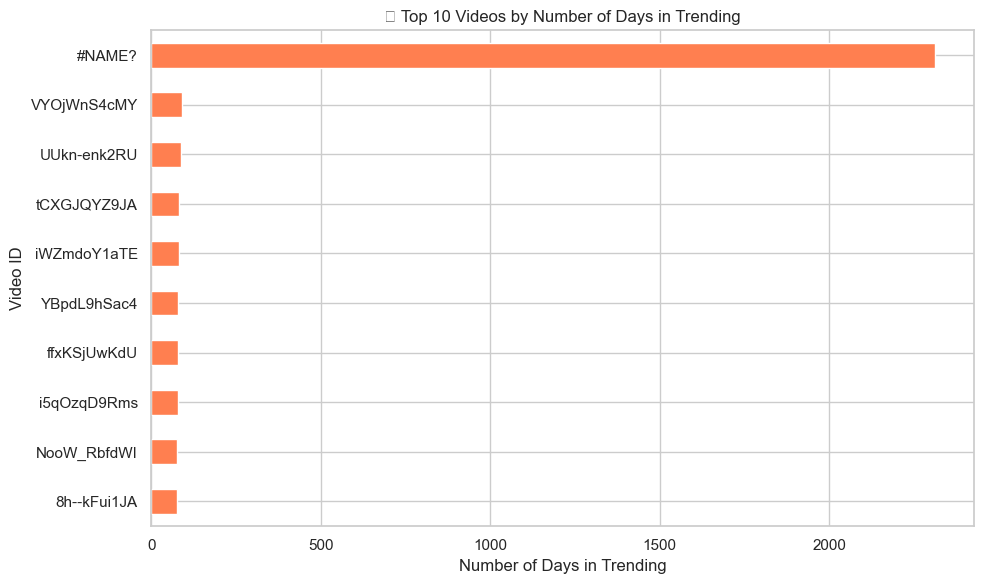

In [380]:
plt.figure(figsize=(10, 6))
video_trend_days.head(10).plot(kind='barh', color='coral')
plt.title('🔥 Top 10 Videos by Number of Days in Trending')
plt.xlabel('Number of Days in Trending')
plt.ylabel('Video ID')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Q3: Which channels have the highest number of videos that trended in multiple countries?

Top 10 channels with most multi-country trending videos:
channel_title
VikatanTV                             174
RadaanMedia                           146
The Late Show with Stephen Colbert    133
ÐÐ½Ð°ÑÐ¾Ð»Ð¸Ð¹ Ð¨Ð°ÑÐ¸Ð¹           121
Анатолий Шарий                        120
Elhiwar Ettounsi                      102
THIRU TV                               92
Россия 24                              90
The Daily Show with Trevor Noah        89
WWE                                    86
Name: count, dtype: int64


/var/folders/7x/st2npcgx3wdb526rvqtw1trm0000gn/T/ipykernel_17035/4188828802.py:23: UserWarning: Glyph 144 (\x90) missing from current font.
  plt.tight_layout()
/var/folders/7x/st2npcgx3wdb526rvqtw1trm0000gn/T/ipykernel_17035/4188828802.py:23: UserWarning: Glyph 130 (\x82) missing from current font.
  plt.tight_layout()
/var/folders/7x/st2npcgx3wdb526rvqtw1trm0000gn/T/ipykernel_17035/4188828802.py:23: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.tight_layout()
/Users/sarahtgh/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 144 (\x90) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sarahtgh/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sarahtgh/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from 

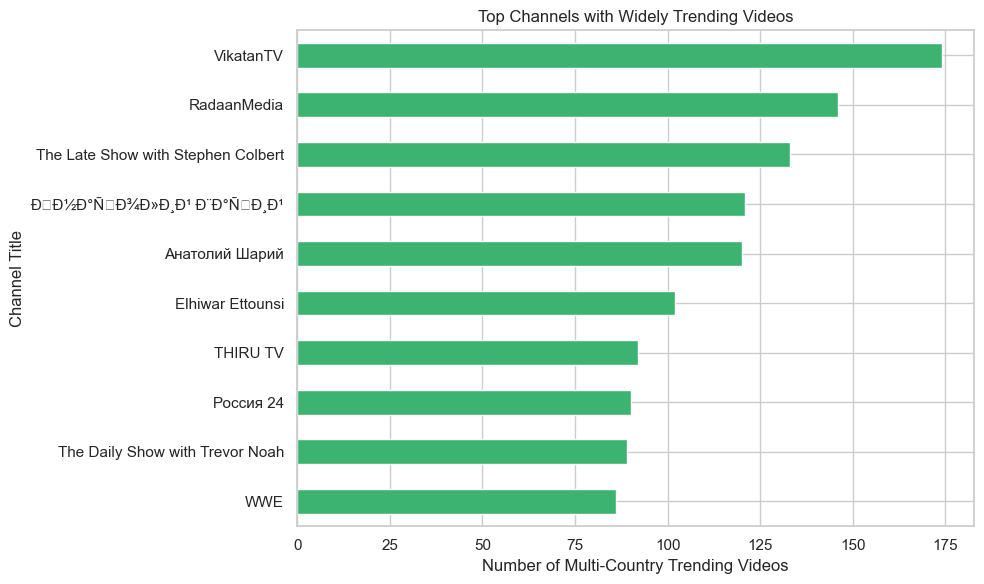

In [381]:
# Count unique countries each video trended in
video_country_counts = df[['video_id', 'country']].drop_duplicates()
country_occurrence = video_country_counts['video_id'].value_counts()

# Filter for videos that trended in more than one country
multi_country_videos = country_occurrence[country_occurrence > 1].index

# Find channels with most multi-country trending videos
multi_country_channels = df[df['video_id'].isin(multi_country_videos)]
channel_multi_counts = multi_country_channels[['channel_title', 'video_id']].drop_duplicates()
top_channels = channel_multi_counts['channel_title'].value_counts().head(10)

# Display results
print("Top 10 channels with most multi-country trending videos:")
print(top_channels)

# Plot
plt.figure(figsize=(10, 6))
top_channels.sort_values().plot(kind='barh', color='mediumseagreen')
plt.xlabel('Number of Multi-Country Trending Videos')
plt.ylabel('Channel Title')
plt.title('Top Channels with Widely Trending Videos')
plt.tight_layout()
plt.show()


### Q4: Which video categories are more likely to trend in multiple countries?

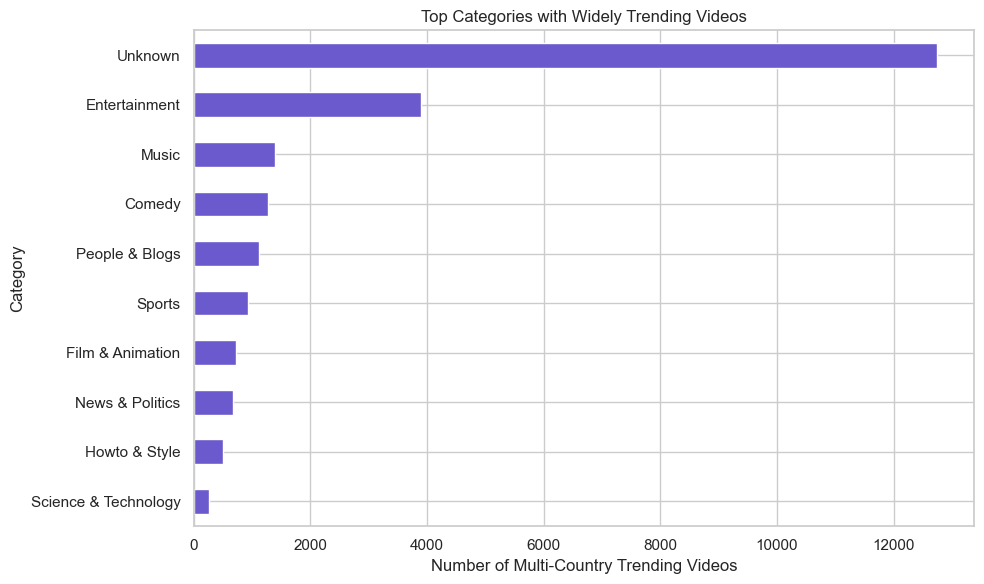

In [382]:
# Join video_id and category to count how many countries each category trended in
multi_df = df[['video_id', 'category_name', 'country']].drop_duplicates()
multi_country_videos = multi_df.groupby('video_id')['country'].nunique()
multi_country_video_ids = multi_country_videos[multi_country_videos > 1].index

# Filter only multi-country trending videos
multi_country_df = df[df['video_id'].isin(multi_country_video_ids)]

# Count how many multi-country videos belong to each category
category_counts = multi_country_df[['video_id', 'category_name']].drop_duplicates()
top_categories = category_counts['category_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
top_categories.sort_values().plot(kind='barh', color='slateblue')
plt.xlabel('Number of Multi-Country Trending Videos')
plt.ylabel('Category')
plt.title('Top Categories with Widely Trending Videos')
plt.tight_layout()
plt.show()


 ### Q5: Do multi-country trending videos have higher engagement than single-country trending ones?

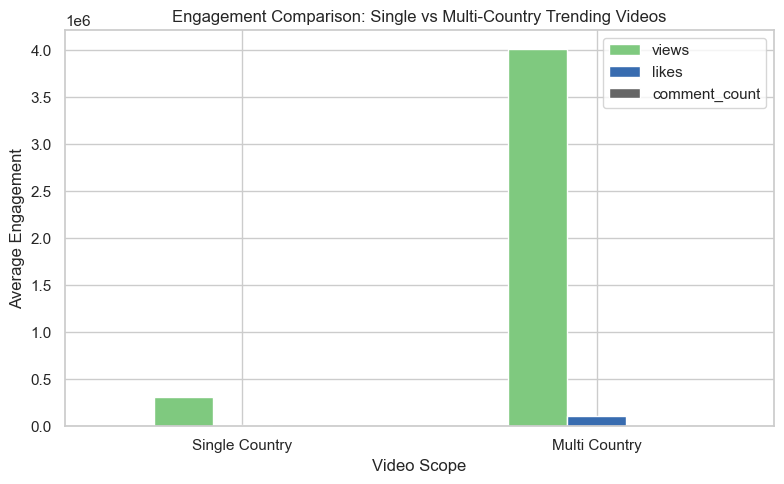

In [383]:
# Tag videos as multi-country or single-country
video_country_counts = df.groupby('video_id')['country'].nunique()
df['is_multi_country'] = df['video_id'].map(lambda x: video_country_counts[x] > 1)

# Calculate average engagement metrics
engagement_by_scope = df.groupby('is_multi_country')[['views', 'likes', 'comment_count']].mean()

# Plot
engagement_by_scope.plot(kind='bar', figsize=(8, 5), colormap='Accent')
plt.xticks(ticks=[0, 1], labels=['Single Country', 'Multi Country'], rotation=0)
plt.xlabel('Video Scope')
plt.ylabel('Average Engagement')
plt.title('Engagement Comparison: Single vs Multi-Country Trending Videos')
plt.tight_layout()
plt.show()


### Q6: Are there specific hours when globally trending videos are usually published?

/var/folders/7x/st2npcgx3wdb526rvqtw1trm0000gn/T/ipykernel_17035/2235812031.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_country_df['publish_hour'] = pd.to_datetime(multi_country_df['publish_time']).dt.hour


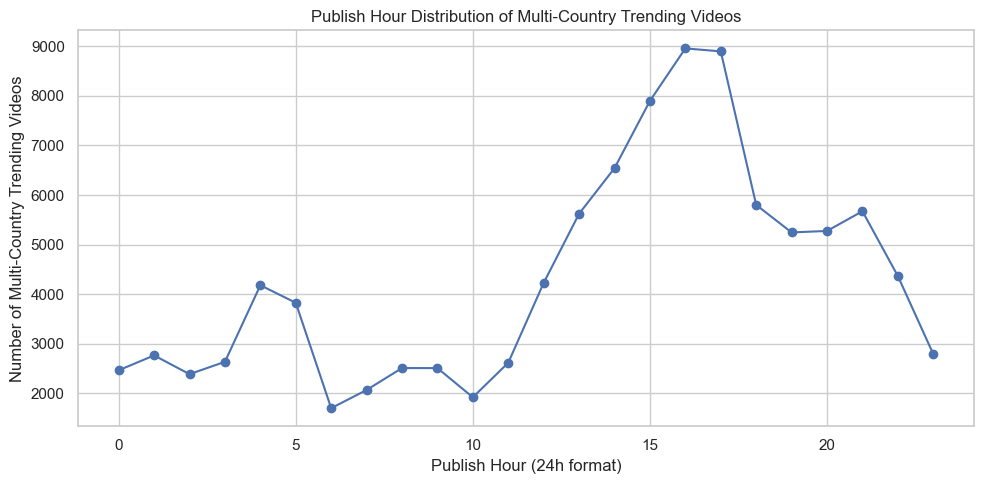

In [384]:

# Focus only on multi-country trending videos
multi_country_ids = df[df['is_multi_country']]['video_id'].unique()
multi_country_df = df[df['video_id'].isin(multi_country_ids)]

# Extract publish hour
multi_country_df['publish_hour'] = pd.to_datetime(multi_country_df['publish_time']).dt.hour

# Count occurrences of each publish hour
hour_distribution = multi_country_df['publish_hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(hour_distribution.index, hour_distribution.values, marker='o')
plt.xlabel('Publish Hour (24h format)')
plt.ylabel('Number of Multi-Country Trending Videos')
plt.title('Publish Hour Distribution of Multi-Country Trending Videos')
plt.grid(True)
plt.tight_layout()
plt.show()


### Q7 : Do videos with longer descriptions trend more globally?


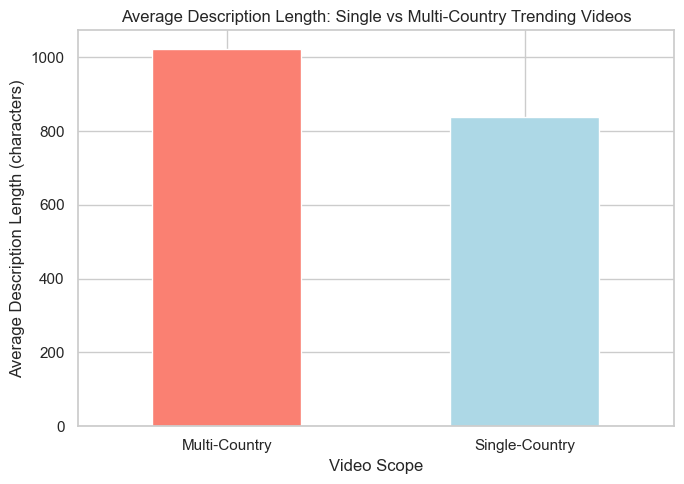

In [385]:
# Add a column for description length
df['description_length'] = df['description'].fillna('').apply(len)

# Label videos as Multi-Country or Single-Country
df['scope'] = df['is_multi_country'].apply(lambda x: 'Multi-Country' if x else 'Single-Country')

# Group by scope and calculate average description length
description_stats = df.groupby('scope')['description_length'].mean()

# Plot
description_stats.plot(kind='bar', figsize=(7, 5), color=['salmon', 'lightblue'])
plt.title('Average Description Length: Single vs Multi-Country Trending Videos')
plt.xlabel('Video Scope')
plt.ylabel('Average Description Length (characters)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [386]:
# Check mean and median of description length
df.groupby('scope')['description_length'].agg(['mean', 'median', 'count'])


,mean,median,count
scope,,,
Multi-Country,1022.055114,764.0,102933
Single-Country,839.547810,555.0,273009


# Statistical Analysis 

#### Question:
- Is there a significant association between the day of the week a video is published and its likelihood of trending?
#### Approach:
- We use a Chi-Square Test of Independence to check if the distribution of trending videos across different days of the week is significantly associated with the country they belong to.


Chi-square Statistic: 6799.352363879647
Degrees of Freedom: 54
p-value: 0.0


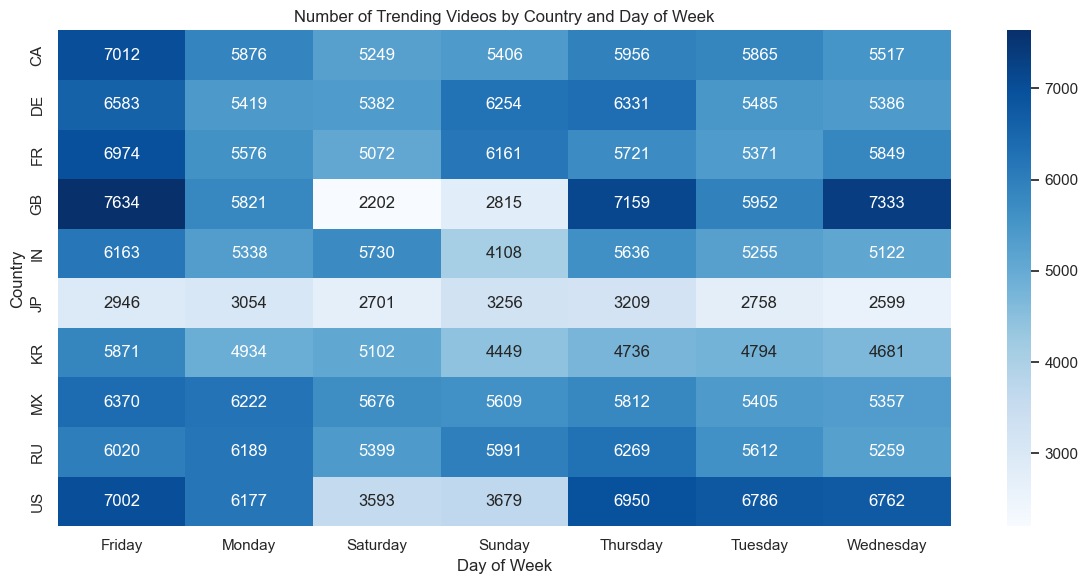

In [387]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Create a new column for day of the week
df['publish_time'] = pd.to_datetime(df['publish_time'], utc=True)
df['day_of_week'] = df['publish_time'].dt.day_name()

# Create contingency table
contingency_table = pd.crosstab(df['country'], df['day_of_week'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)

# Visualize the contingency table
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Number of Trending Videos by Country and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


- Q2: Is there a significant difference in viewer engagement (likes-to-views ratio) across different video categories?

In [388]:
import scipy.stats as stats

# Calculate likes-to-views ratio
df['like_view_ratio'] = df['likes'] / df['views']

# Drop NaNs and infinite values (if any)
df = df[df['like_view_ratio'].notna() & df['like_view_ratio'].apply(lambda x: x != float('inf'))]

# Prepare data for Kruskal-Wallis test
category_groups = df.groupby('category_name')['like_view_ratio'].apply(list)

# Run Kruskal-Wallis test
statistic, p_value = stats.kruskal(*category_groups)

print("Kruskal-Wallis H Statistic:", statistic)
print("p-value:", p_value)


Kruskal-Wallis H Statistic: 35794.111262494676
p-value: 0.0
